<a href="https://colab.research.google.com/github/sunshine659/ML-project/blob/master/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm


In [ ]:
dataframe=pd.read_csv("/content/dataset.csv")
dataframe.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
print(dataframe.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


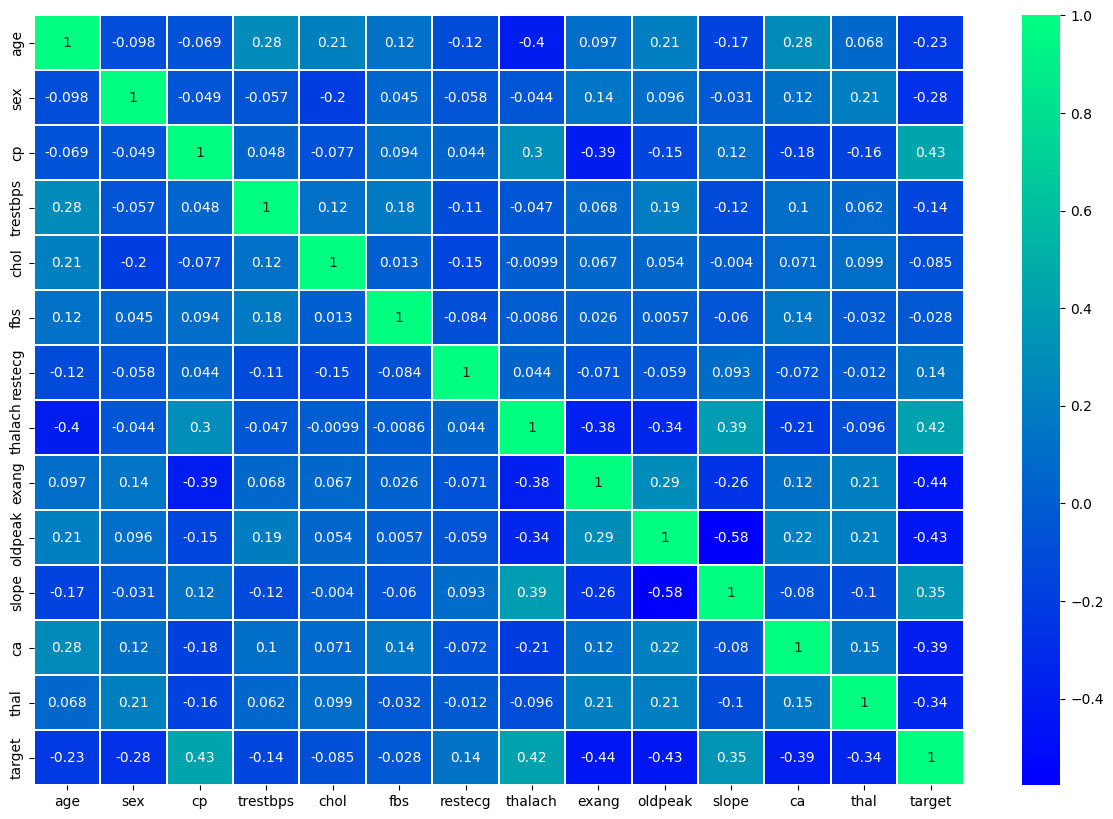

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

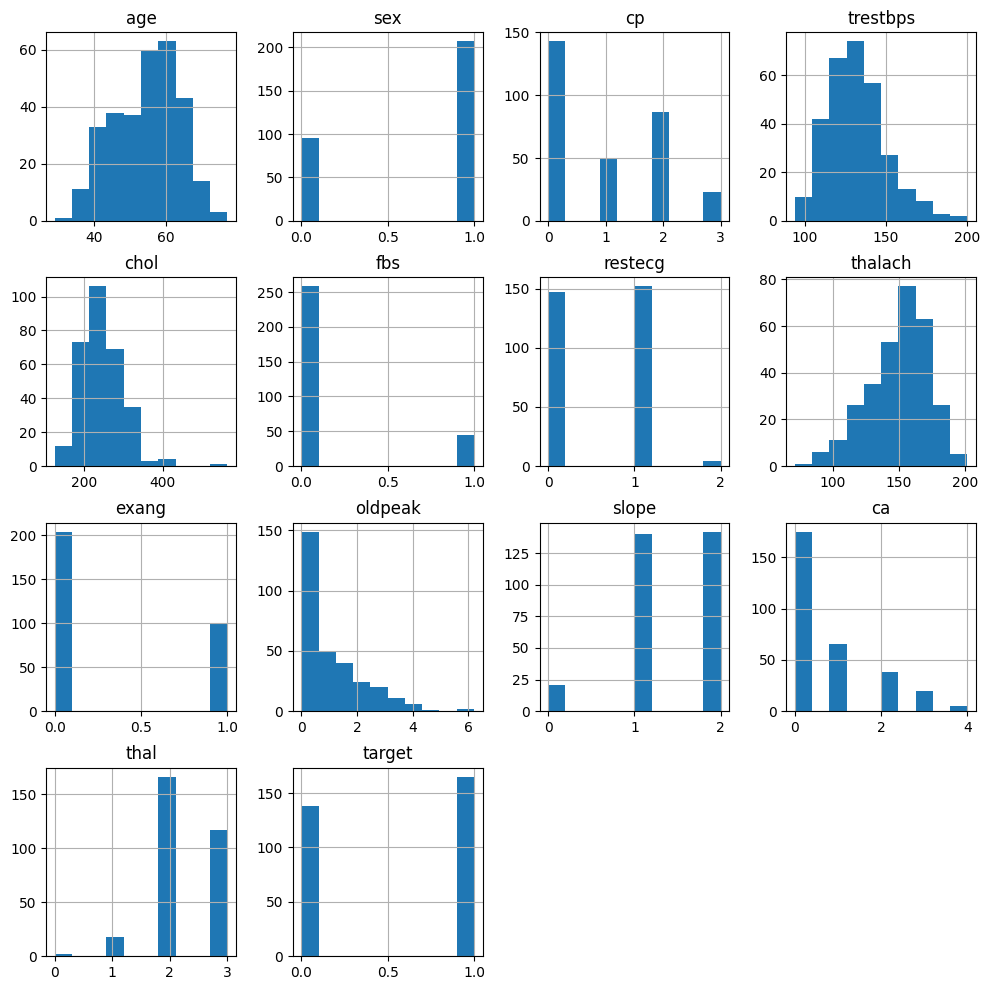

In [ ]:
dataframe.hist(figsize=(12,12))
plt.savefig('featuresplot')

In [ ]:
dataframe["target"].describe()

,target
count,303.000000
mean,0.544554
std,0.498835
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
dataframe["target"].unique()

array([1, 0])

In [ ]:
print(dataframe.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


target
1    165
0    138
Name: count, dtype: int64


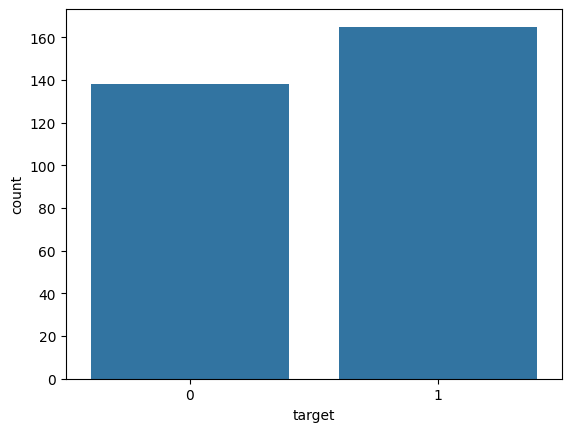

In [ ]:
y = dataframe["target"]

sns.countplot(x="target", data=dataframe)



target_temp = dataframe.target.value_counts()

print(target_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [ ]:
dataframe["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

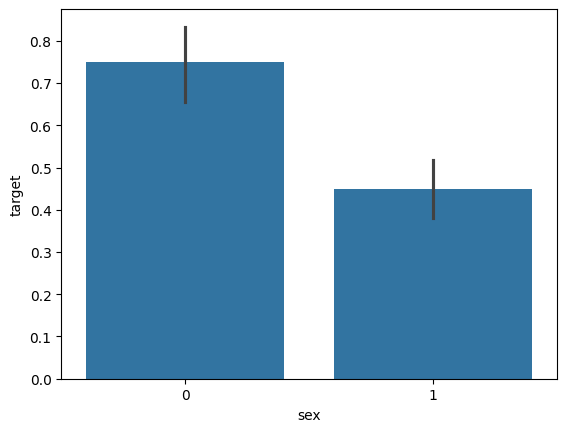

In [ ]:
sns.barplot(x=dataframe["sex"], y=y)


In [ ]:
dataframe["cp"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='cp', ylabel='target'>

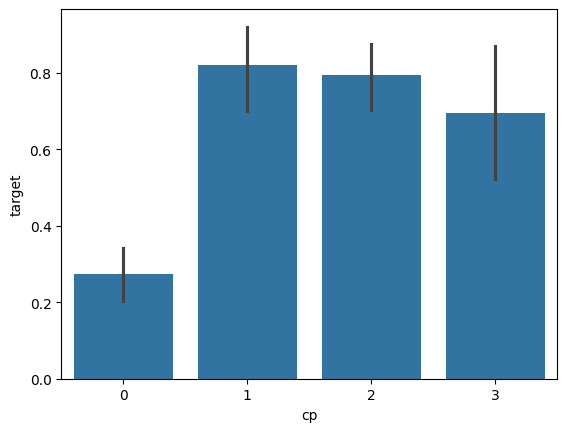

In [ ]:
sns.barplot(x=dataframe["cp"],y=y)

In [ ]:
dataframe["fbs"].describe()

,fbs
count,303.000000
mean,0.148515
std,0.356198
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
dataframe["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

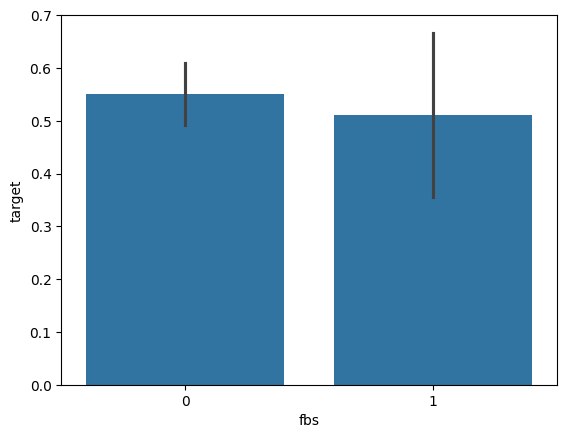

In [ ]:
sns.barplot(x=dataframe["fbs"], y=y)

In [ ]:
dataframe["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

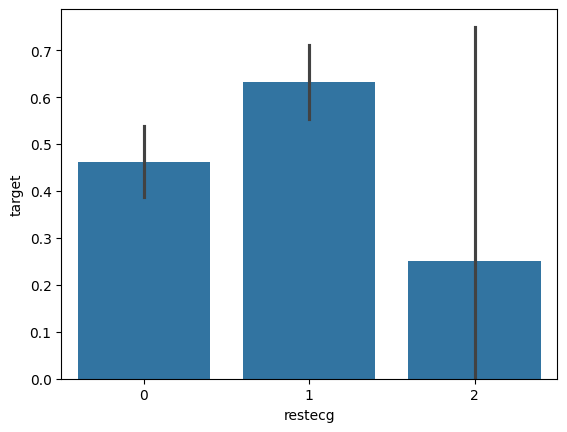

In [ ]:
sns.barplot(x=dataframe["restecg"], y=y)

In [ ]:
dataframe["exang"].unique()


array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

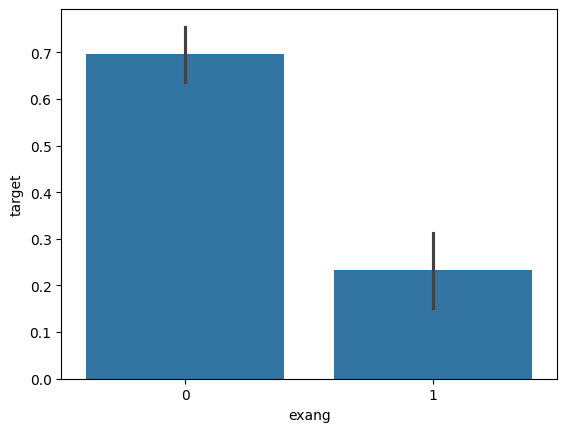

In [ ]:
sns.barplot(x=dataframe["exang"], y=y)


In [ ]:
dataframe["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='target'>

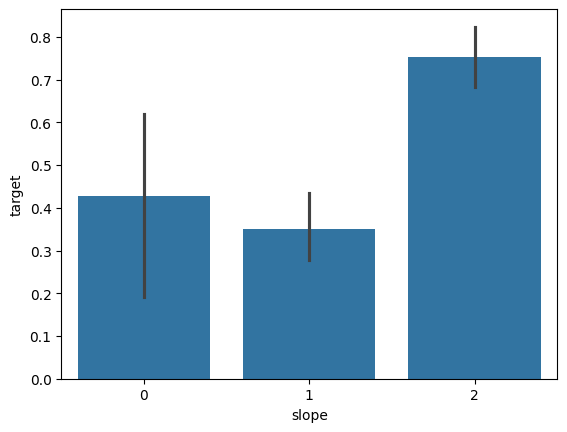

In [ ]:
sns.barplot(x=dataframe["slope"], y=y)

In [ ]:
dataframe["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: xlabel='ca', ylabel='count'>

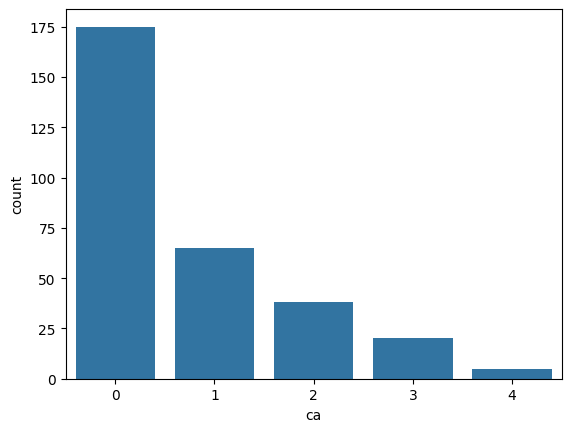

In [ ]:
sns.countplot(x="ca", data=dataframe)


<Axes: xlabel='ca', ylabel='target'>

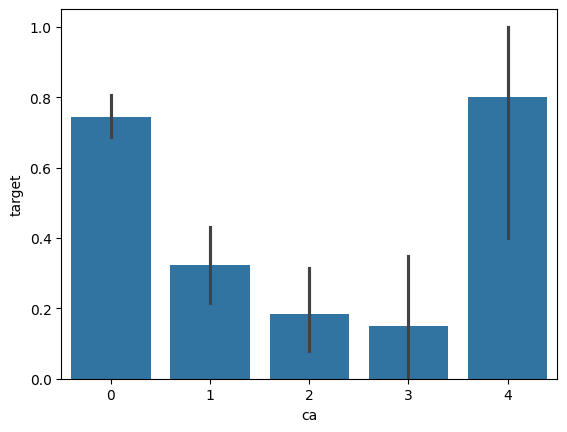

In [ ]:
sns.barplot(x=dataframe["ca"], y=y)

In [ ]:
dataframe["thal"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='target'>

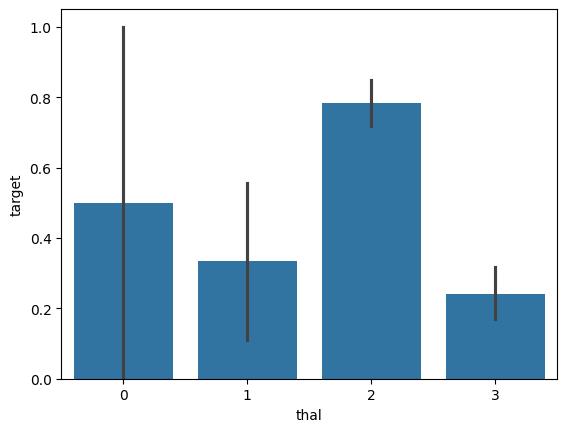

In [ ]:
sns.barplot(x=dataframe["thal"], y=y)

/tmp/ipython-input-29-3160766242.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe["thal"])


<Axes: xlabel='thal', ylabel='Density'>

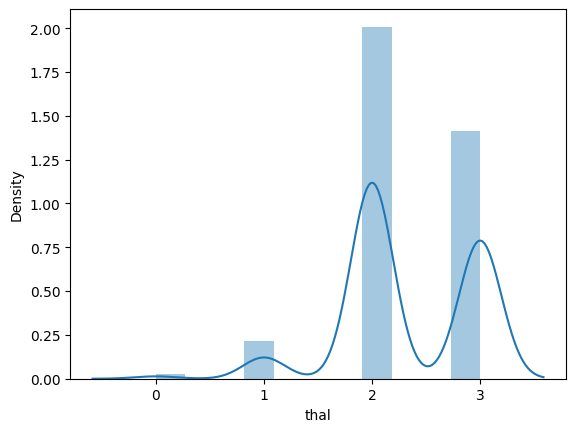

In [ ]:
sns.distplot(dataframe["thal"])

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataframe.drop("target",axis=1)
target = dataframe["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=42)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape

(242,)

In [ ]:
Y_test.shape

(61,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
dataframe_encoded = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=True)
predictors = dataframe_encoded.drop('target', axis=1)
target = dataframe_encoded['target']
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Y_pred_lr.shape

(61,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 88.52 %


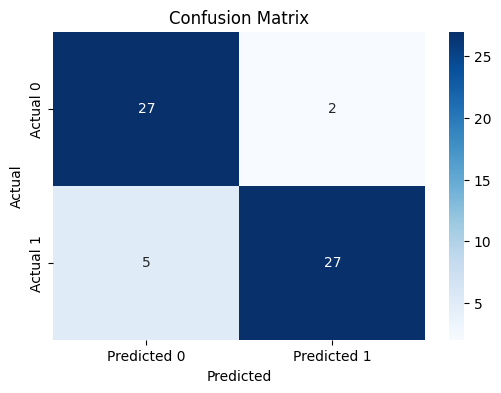

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred_lr, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.84      0.93      0.89        29
     Class 1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [ ]:
X = dataframe.drop('target', axis=1)
y = dataframe['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'class_weight': [None, 'balanced']
}

In [ ]:
sv = svm.SVC()
grid_search = GridSearchCV(sv, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
print("Best parameters:", grid_search.best_params_)
best_sv = grid_search.best_estimator_

Best parameters: {'C': 1, 'class_weight': None, 'kernel': 'rbf'}


In [ ]:
y_pred_svm = best_sv.predict(X_test_scaled)
score_svm = round(accuracy_score(y_test, y_pred_svm) * 100, 2)
print("The accuracy score achieved using SVM is: " + str(score_svm) + " %")

The accuracy score achieved using SVM is: 86.89 %


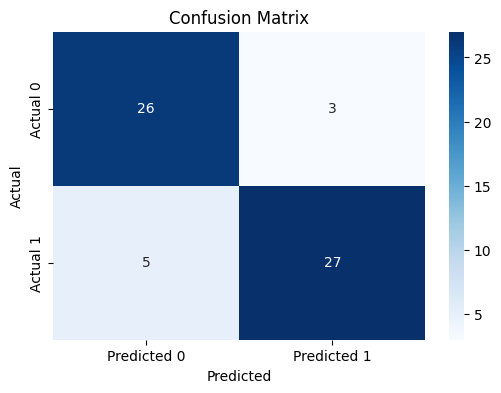

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_svm, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.84      0.90      0.87        29
     Class 1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print("Best parameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_


Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
y_pred_knn = best_knn.predict(X_test_scaled)

In [ ]:
score_knn = round(accuracy_score(y_test, y_pred_knn) * 100, 2)
print("The accuracy score achieved using KNN is: " + str(score_knn) + " %")

The accuracy score achieved using KNN is: 83.61 %


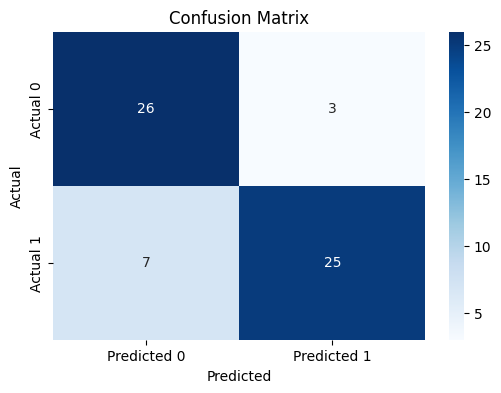

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_knn, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.79      0.90      0.84        29
     Class 1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
models = ['Logistic Regression', 'SVM', 'KNN']
accuracy_scores = [88.52, 86.89, 83.61]

/tmp/ipython-input-1014134666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette=colors)


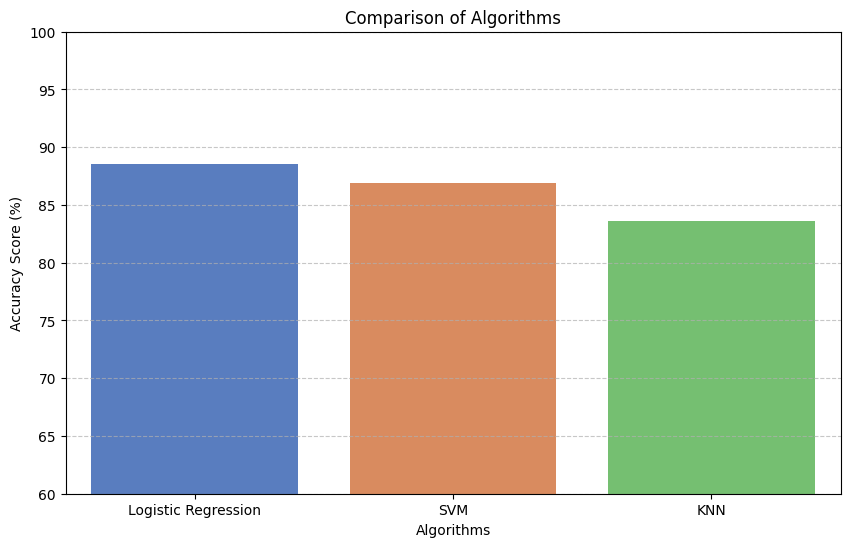

In [ ]:
colors = sns.color_palette("muted", len(models))

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_scores, palette=colors)

plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score (%)")
plt.title("Comparison of Algorithms")
plt.ylim(60, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()